In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\lordtable\\anaconda3\\envs\\UTDSGC-C2-env'

In [17]:
# DS Basics
import numpy as np
import pandas as pd
import pandas_profiling as pdp
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from Dora import Dora

# SQL
from sqlalchemy import create_engine
import pymysql

# SKLearn Stuff
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# helpers
%matplotlib inline

# Data preparation & cleaning

In [45]:
#to read data on csv, use the command below
#this is the raw data from SQL and saved as csv as it is
bank=pd.read_csv('bank-additional-full_ed.csv')

In [46]:
# for ease of reading, interpreting & reporting, save as a html file and ready with browser
#pdp.ProfileReport(bank).to_file('bank-additional_full_ed_raw_PandasProfilingReport.html')

# if want to see the ProfileReport here on the notebook, remove the to_file method

In [47]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   "age                41188 non-null  object 
 1   ""job""             41188 non-null  object 
 2   ""marital""         41188 non-null  object 
 3   ""education""       41188 non-null  object 
 4   ""default""         41188 non-null  object 
 5   ""housing""         41188 non-null  object 
 6   ""loan""            41188 non-null  object 
 7   ""contact""         41188 non-null  object 
 8   ""month""           41188 non-null  object 
 9   ""day_of_week""     41188 non-null  object 
 10  ""duration""        41188 non-null  int64  
 11  ""campaign""        41188 non-null  int64  
 12  ""pdays""           41188 non-null  int64  
 13  ""previous""        41188 non-null  int64  
 14  ""poutcome""        41188 non-null  object 
 15  ""emp.var.rate""    41188 non-null  float64
 16  ""co

In [48]:
bank.describe()

,"""""duration""""","""""campaign""""","""""pdays""""","""""previous""""","""""emp.var.rate""""","""""cons.price.idx""""","""""cons.conf.idx""""","""""euribor3m""""","""""nr.employed"""""
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [49]:
bank.head()

,"""age","""""job""""","""""marital""""","""""education""""","""""default""""","""""housing""""","""""loan""""","""""contact""""","""""month""""","""""day_of_week""""",...,"""""campaign""""","""""pdays""""","""""previous""""","""""poutcome""""","""""emp.var.rate""""","""""cons.price.idx""""","""""cons.conf.idx""""","""""euribor3m""""","""""nr.employed""""","""""y"""""""
0,"""56","""""housemaid""""","""""married""""","""""basic.4y""""","""""no""""","""""no""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
1,"""57","""""services""""","""""married""""","""""high.school""""","""""unknown""""","""""no""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
2,"""37","""""services""""","""""married""""","""""high.school""""","""""no""""","""""yes""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
3,"""40","""""admin.""""","""""married""""","""""basic.6y""""","""""no""""","""""no""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
4,"""56","""""services""""","""""married""""","""""high.school""""","""""no""""","""""no""""","""""yes""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""


In [50]:
# removing the extra quotation marks from the headers
new_headers = []

for header in bank.columns: # bank.columns is my list of headers
    header = header.strip('"') # Remove the quotes off each header
    new_headers.append(header) # Save the new strings without the quotes

bank.columns = new_headers # Replace the old headers with the new list

In [51]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"""56","""""housemaid""""","""""married""""","""""basic.4y""""","""""no""""","""""no""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
1,"""57","""""services""""","""""married""""","""""high.school""""","""""unknown""""","""""no""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
2,"""37","""""services""""","""""married""""","""""high.school""""","""""no""""","""""yes""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
3,"""40","""""admin.""""","""""married""""","""""basic.6y""""","""""no""""","""""no""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
4,"""56","""""services""""","""""married""""","""""high.school""""","""""no""""","""""no""""","""""yes""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""


In [52]:
# rename header columns: remove the extra ""


#bank_ed=bank.rename(columns={'old name':'new name'})
#bank_ed.head()

In [53]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [55]:
#sns.scatterplot(data=bank, x="euribor3m", y="nr.employed")

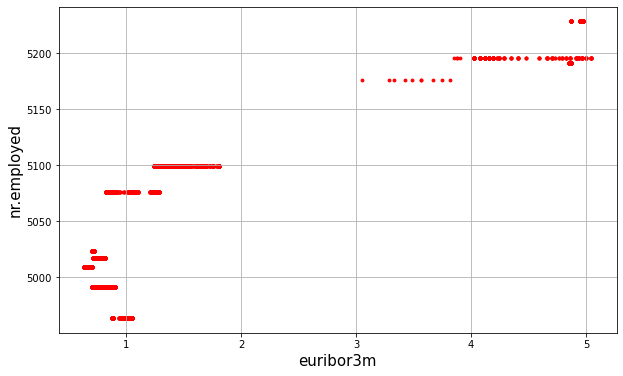

In [59]:
# plotting some numeric features

#
fig,ax=plt.subplots(figsize=(10,6))
#fig.subplots_adjust(hspace=0.8,wspace=0.25)
#

ax.scatter(bank["euribor3m"], bank["nr.employed"],s=8,c='red',label='????')
ax.set_xlabel('euribor3m',fontsize=15)
ax.set_ylabel('nr.employed',fontsize=15)

ax.grid()

# adding a perfect fit line for ease of analysis
#ax.plot(y1_test,y1_test,linewidth=3,color='red',label='Perfect-fit line')
#
#ax.legend(fontsize=15)

#
#fig.suptitle('Credit Line (LIMIT_BAL) Random Forest Predictions vs Actual', fontsize=25)

In [60]:
# build dataframe subsets for ease of use sns.pairplot
# let's investigate the numeric variables that show high correlation
bank_df_num_feat=bank[["pdays","previous","emp.var.rate","cons.price.idx","euribor3m","nr.employed"]]
bank_df_num_feat.head()


,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,999,0,1.1,93.994,4.857,5191.0
1,999,0,1.1,93.994,4.857,5191.0
2,999,0,1.1,93.994,4.857,5191.0
3,999,0,1.1,93.994,4.857,5191.0
4,999,0,1.1,93.994,4.857,5191.0


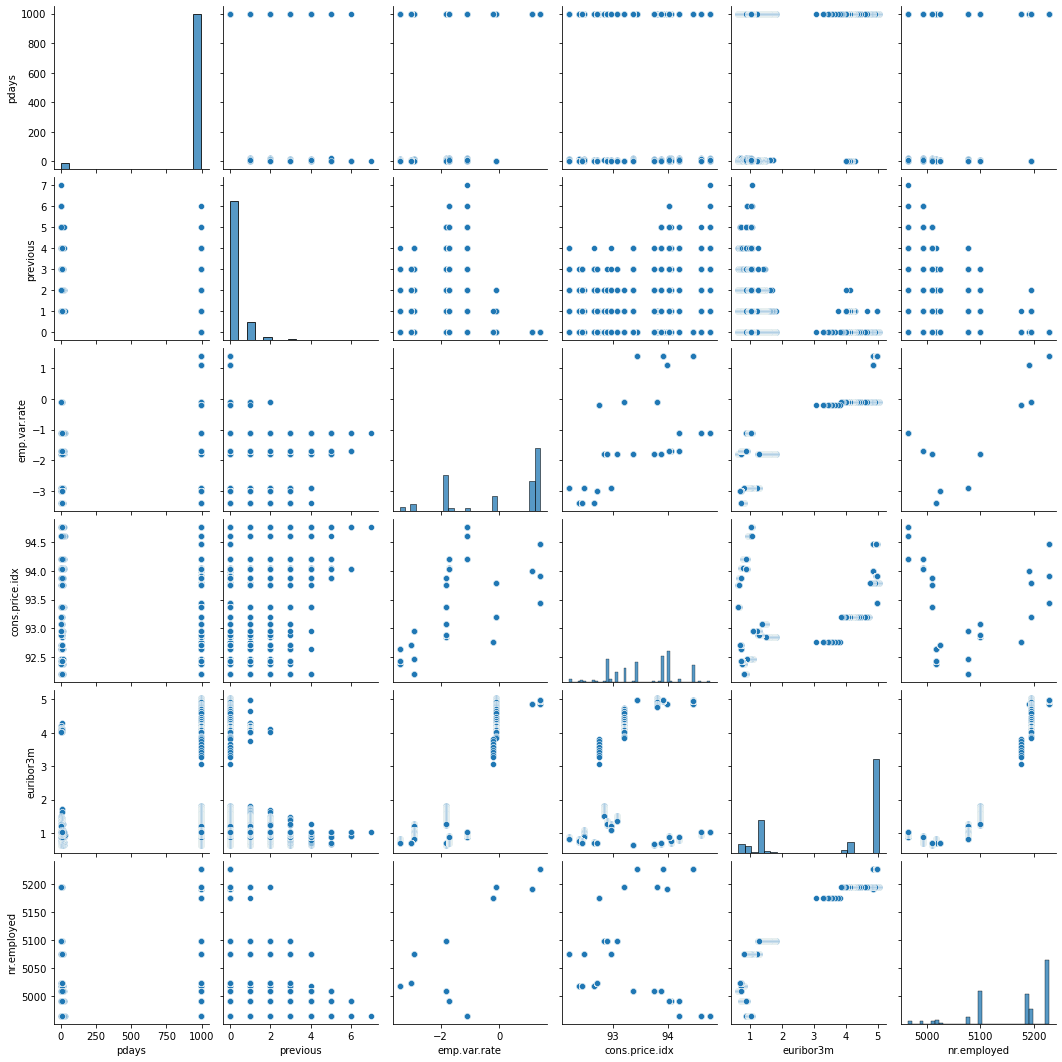

In [61]:
g=sns.pairplot(bank_df_num_feat, diag_kind="hist")
#g=sns.pairplot(bank_df_num_feat, hue="variable name for color-coding points", diag_kind="hist")

#g.savefig('filename.png')